## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, how='inner', on='Mouse ID')
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df = merged_df.groupby("Drug Regimen")

tumor_mean = regimen_df["Tumor Volume (mm3)"].mean()
tumor_med = regimen_df["Tumor Volume (mm3)"].median()
tumor_var = regimen_df["Tumor Volume (mm3)"].var()
tumor_sd = regimen_df["Tumor Volume (mm3)"].std()
tumor_sem = regimen_df["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Tumor Volume Mean": tumor_mean, "Tumor Volume Median": tumor_med, "Tumor Volume Variance": tumor_var,
                          "Tumor Volume Std Dev": tumor_sd, "Tumor Volume SEM": tumor_sem})

summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'Number of Instances')

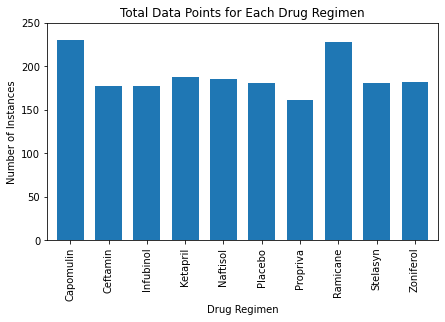

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_count = regimen_df["Mouse ID"].count()
count_df = pd.DataFrame({"Number of Instances": regimen_count})

regimen_plot = count_df.plot.bar(figsize=(7, 4), width=0.7, title="Total Data Points for Each Drug Regimen", 
                                 ylim=(0, max(regimen_count)+20), legend=False)
regimen_plot.set_ylabel("Number of Instances")


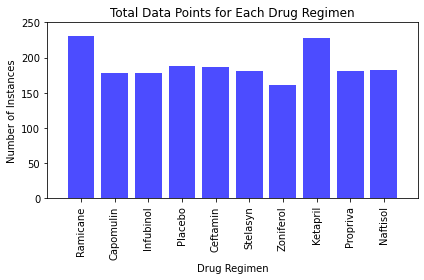

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = np.arange(len(merged_df["Drug Regimen"].unique()))
y_axis = regimen_df["Mouse ID"].count()

tick_locations = [value for value in x_axis]


plt.bar(x_axis, y_axis, color='b', alpha=0.7, align="center")
plt.xticks(tick_locations, merged_df["Drug Regimen"].unique(), rotation="vertical")

plt.xlim(-1, len(x_axis))
plt.ylim(0, max(y_axis)+20)

plt.title("Total Data Points for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Instances")
plt.tight_layout()

## Pie plots

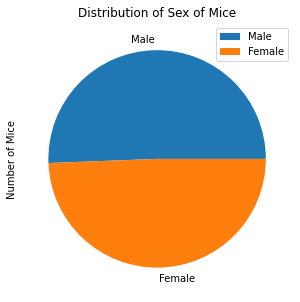

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = merged_df["Sex"].value_counts()
gender_df = pd.DataFrame({"Number of Mice": gender_count})

gender_plot = gender_df.plot.pie(y='Number of Mice', figsize=(5, 5), title="Distribution of Sex of Mice") 
                                 
gender_plot

Text(0, 0.5, 'Number of Mice')

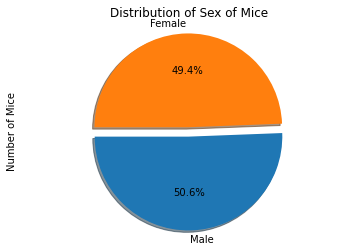

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_count.index
gen_count = gender_count.values
explode = (0.1, 0)

plt.pie(gen_count, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.title("Distribution of Sex of Mice")
plt.ylabel("Number of Mice")

## Quartiles, outliers and boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

drug_list = merged_df["Drug Regimen"].unique()
tumor_start = []
tumor_end = []

tumor_start

KeyError: 'Tumor Volume (mm3)'

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen